In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read all data from results directory
import os
import glob

# Get all subdirectories in the results directory
result_dirs = glob.glob('results/incl_*_period_*')

data = []

for dir_path in result_dirs:
    # Extract inclination and period from directory name
    incl, period = map(float, dir_path.split('/')[-1].replace('incl_', '').replace('period_', '').split('_'))
    
    # Read max_residuals.csv file
    csv_path = os.path.join(dir_path, 'max_residuals.csv')
    if os.path.exists(csv_path):
        with open(csv_path, 'r') as f:
            next(f)  # Skip header
            for line in f:
                filter_name, max_residual = line.strip().split(',')
                data.append({
                    'Inclination': incl,
                    'Period': period,
                    'Filter': filter_name,
                    'Max Residual': float(max_residual)
                })

# Create DataFrame
results_df = pd.DataFrame(data)

# Sort the DataFrame
results_df = results_df.sort_values(['Inclination', 'Period', 'Filter'])

# Display the first few rows
print(results_df.head())



     Inclination  Period      Filter  Max Residual
173          0.0    10.0  Bolometric           0.0
172          0.0    10.0       GaiaG           0.0
170          0.0    10.0    JohnsonI           0.0
168          0.0    10.0    JohnsonU           0.0
169          0.0    10.0    JohnsonV           0.0


In [17]:
results_df['Filter'].unique()


array(['Bolometric', 'GaiaG', 'JohnsonI', 'JohnsonU', 'JohnsonV',
       'Stromgrenv'], dtype=object)

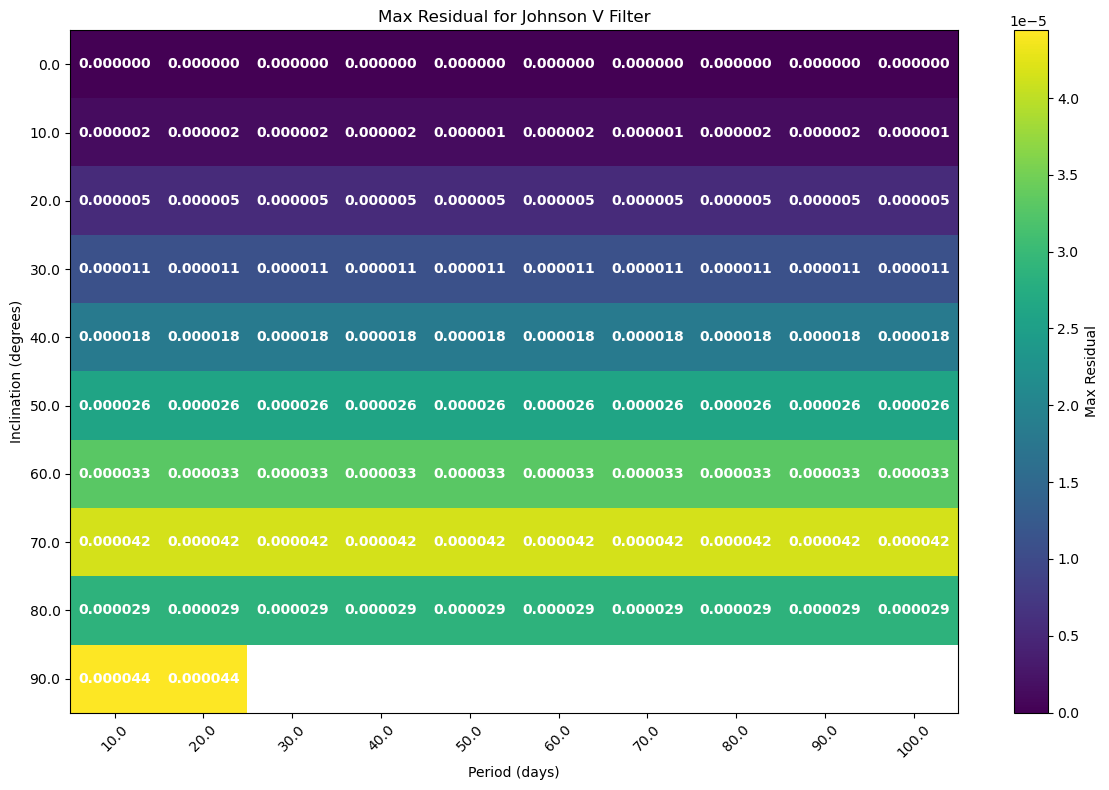

In [24]:
# Filter the DataFrame for Bolometric filter
filter = 'Johnson V'
bolometric_df = results_df[results_df['Filter'] == filter.replace(' ', '')]

# Create a pivot table for Bolometric data
pivot_table = bolometric_df.pivot(index='Inclination', columns='Period', values='Max Residual')

# Create a heatmap
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(pivot_table, cmap='viridis', aspect='auto', interpolation='nearest')

# Add colorbar
plt.colorbar(heatmap, label='Max Residual')

# Set labels and title
plt.xlabel('Period (days)')
plt.ylabel('Inclination (degrees)')
plt.title(f'Max Residual for {filter} Filter')

# Set x and y ticks
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add text annotations in each cell
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, f'{pivot_table.iloc[i, j]:.6f}', 
                 ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()

plt.savefig(f'{filter.replace(" ",  "")}_max_residuals.png')



In [25]:
# Get the max residual and corresponding period and inclination for each filter
filter_summary = []

for filter_name in results_df['Filter'].unique():
    filter_df = results_df[results_df['Filter'] == filter_name]
    max_residual_row = filter_df.loc[filter_df['Max Residual'].idxmax()]
    
    filter_summary.append({
        'Filter': filter_name,
        'Max Residual': max_residual_row['Max Residual'],
        'Period': max_residual_row['Period'],
        'Inclination': max_residual_row['Inclination']
    })

# Create a DataFrame from the summary
summary_df = pd.DataFrame(filter_summary)

# Sort the DataFrame by Max Residual in descending order
summary_df = summary_df.sort_values('Max Residual', ascending=False)

# Display the summary
print("Summary of Max Residuals for Each Filter:")
print(summary_df.to_string(index=False))

# Optionally, save the summary to a CSV file
summary_df.to_csv('filter_max_residuals_summary.csv', index=False)
print("\nSummary saved to 'filter_max_residuals_summary.csv'")


Summary of Max Residuals for Each Filter:
    Filter  Max Residual  Period  Inclination
Bolometric      0.000805    10.0         90.0
     GaiaG      0.000302    10.0         90.0
  JohnsonU      0.000092    10.0         90.0
  JohnsonV      0.000044    10.0         90.0
  JohnsonI      0.000018    10.0         90.0
Stromgrenv      0.000012    10.0         90.0

Summary saved to 'filter_max_residuals_summary.csv'
